In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#!unzip '/content/drive/My Drive/Edvancer/Deep learning/Project 1  Multiclass Multilabel prediction For stack overflow Questions/stacksample.zip'

In [3]:
answers1 = pd.read_csv('Answers.csv', encoding='ISO-8859-1')
questions1 = pd.read_csv('Questions.csv', encoding='ISO-8859-1')
tags1 = pd.read_csv('Tags.csv')

In [4]:
answers = answers1.copy()
questions = questions1.copy()
tags = tags1.copy()

In [5]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [6]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [7]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [41]:
print('Shape of Answers dataset:', answers.shape)
print('Shape of Questions dataset:', questions.shape)
print('Shape of Tags dataset:', tags.shape)

Shape of Answers dataset: (2014516, 6)
Shape of Questions dataset: (93153, 3)
Shape of Tags dataset: (3750994, 2)


#EDA:

In [9]:
print('Number of unique Scores :', questions['Score'].nunique())

questions[questions.Score >= 5].shape
#Henceforth we will select the questions with score more than 5 because they would be of much more importance

Number of unique Scores : 532


(93153, 7)

In [10]:
questions = questions[questions.Score >=5]
print(questions.shape)
questions.head()

(93153, 7)


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [11]:
questions.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate', 'Score'], inplace=True)

In [12]:
top10_tags = list(tags.Tag.value_counts()[:10].index)
print(top10_tags)

new_tags = tags[tags.Tag.isin(top10_tags)]
print(new_tags.shape)
new_tags.reset_index(drop=True, inplace=True)
new_tags.head()

['javascript', 'java', 'c#', 'php', 'android', 'jquery', 'python', 'html', 'c++', 'ios']
(826739, 2)


,Id,Tag
0,260,c#
1,330,c++
2,650,c#
3,930,c#
4,1010,c#


In [13]:
questions.isnull().sum()

Id       0
Title    0
Body     0
dtype: int64

In [14]:
new_tags.isnull().sum()

Id     0
Tag    0
dtype: int64

In [15]:
df = questions.merge(new_tags, on='Id')
print(df.shape)
df.head()

(56008, 4)


,Id,Title,Body,Tag
0,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#
1,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++
2,650,Automatically update version number,<p>I would like the version property of my app...,c#
3,930,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,c#
4,1010,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,c#


In [16]:
df.isnull().sum()

Id       0
Title    0
Body     0
Tag      0
dtype: int64

In [17]:
df.drop(columns=['Id'], inplace=True)

In [18]:
train_size = round(df.shape[0]*0.8)
test_size = df.shape[0] - train_size
print(train_size)
print(test_size)

44806
11202


#SPLITTING OF DATA:

In [19]:
X = df.drop(['Tag'],axis=1)
y = df['Tag']

In [93]:
y1 = df['Tag']
y_train1, y_test1 = y1[:train_size], y1[train_size:]
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_test1 = LE.fit_transform(y_test1)

In [20]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)

In [21]:
y[y==7]

array([7, 7, 7, ..., 7, 7, 7])

In [22]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(44806, 2) (11202, 2)
(44806,) (11202,)


In [23]:
X_train.head()

,Title,Body
0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
1,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
2,Automatically update version number,<p>I would like the version property of my app...
3,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...
4,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...


In [24]:
X_test.head()

,Title,Body
44806,CoreData - Update model class instead of creat...,<p>I am using CoreData in my iOS application. ...
44807,How does this declaration invoke the Most Vexi...,<p>Consider the following program:</p>\n\n<pre...
44808,Eclipse Errors/Warnings ignore assert in unuse...,<p>I have had 'hidden' bugs due to Eclipse not...
44809,Does msvcrt uses a different heap for allocati...,<p>I've read about that some time ago but am u...
44810,"The method show(FragmentManager, String) in th...",<p>I have a problem with Fragments.</p>\n\n<p>...


#TEXT PREPROCESSING:

In [25]:
!pip install beautifulsoup4

In [26]:
from bs4 import BeautifulSoup

# Converting html to text in the body
X_train['Body'] = X_train['Body'].apply(lambda x: BeautifulSoup(x).get_text())
X_test['Body'] = X_test['Body'].apply(lambda x: BeautifulSoup(x).get_text())

X_train['Title'] = X_train['Title'].apply(lambda x: BeautifulSoup(x).get_text())
X_test['Title'] = X_test['Title'].apply(lambda x: BeautifulSoup(x).get_text())

In [27]:
#Removing Punctuations

X_train.replace('[^a-zA-Z]',' ', regex=True, inplace=True)
X_test.replace('[^a-zA-Z]',' ', regex=True, inplace=True)

In [28]:
#Converting to lower case characters

for index in X_train.columns:
  X_train[index] = X_train[index].str.lower()

for index in X_test.columns:
  X_test[index] = X_test[index].str.lower()

In [29]:
#Removing multiple blank spaces

X_train = X_train.replace('\s+', ' ', regex=True)
X_test = X_test.replace('\s+', ' ', regex=True)

In [30]:
X_train

,Title,Body
0,adding scripting functionality to net applicat...,i have a little game written in c it uses a da...
1,should i use nested classes in this case,i am working on a collection of classes used f...
2,automatically update version number,i would like the version property of my applic...
3,how do i connect to a database and loop over a...,what s the simplest way to connect and query a...
4,how to get the value of built encoded viewstate,i need to grab the base encoded representation...
...,...,...
44801,finally equivalent for if elif statements in ...,does python have a finally equivalent for its ...
44802,os listdir is removing character accent,in windows file explorer create a new txt file...
44803,does using the this keyword affect java perfor...,does using the this keyword affect java perfor...
44804,aligning on the same line,i m just trying to align some text on the same...


In [31]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
type(X_train)

pandas.core.frame.DataFrame

In [33]:
stop_words = set(stopwords.words('english')) 
len(stop_words)
X_train['Body'] = X_train['Body'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
X_train['Title'] = X_train['Title'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

X_test['Body'] = X_test['Body'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
X_test['Title'] = X_test['Title'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [34]:
stemmer = nltk.SnowballStemmer(language='english')

X_train['Body'] = X_train['Body'].apply(lambda x: ' '.join(stemmer.stem(term) for term in x.split()))
X_train['Title'] = X_train['Title'].apply(lambda x: ' '.join(stemmer.stem(term) for term in x.split()))

X_test['Body'] = X_test['Body'].apply(lambda x: ' '.join(stemmer.stem(term) for term in x.split()))
X_test['Title'] = X_test['Title'].apply(lambda x: ' '.join(stemmer.stem(term) for term in x.split()))

In [35]:
train_lines = []
for row in range(0,X_train.shape[0]):
  train_lines.append(' '.join(str(x) for x in X_train.iloc[row,:]))

test_lines = []
for row in range(0,X_test.shape[0]):
  test_lines.append(' '.join(str(x) for x in X_test.iloc[row,:]))

In [36]:
train_lines

['ad script function net applic littl game written c use databas back end trade card game want implement function card script mean essenti interfac icard card class implement public class card icard contain function call game make thing maintain moddabl would like class card sourc code databas essenti compil first use add chang card add databas tell applic refresh without need assembl deploy especi sinc would talk assembl per card mean hundr assembl possibl regist class sourc file instanti etc icard card current new mygam cardlibrari card card current onenterplay ref currentgamest languag c extra bonus possibl write script net languag',
 'use nest class case work collect class use video playback record one main class act like public interfac method like play stop paus record etc workhors class video decod video encod learn exist nest class c curious know programm think use littl wari realli sure benefit drawback seem accord book read use case mine book suggest scenario like mine good s

In [37]:
test_lines

['coredata updat model class instead creat new use coredata io applic face problem time creat nsmanagedobject class creat entiti xcdatamodeld file creat attribut relationship choos option editor creat nsmanagedobject class creat h class h class creat custom method fetch save object far good afterward futur chang attribut repeat step time custom code written step remov automat question updat exist class instead use option editor creat nsmanagedobject class remov custom code help appreci updat test approach categori mogern look fine choosen categori pure xcode approach want take risk rd parti may break futur due xcode updat caus problem data migrat thank tom harrington valentin shamardin guid',
 'declar invok vex pars consid follow program includ fstream struct int main int argc char argv std fstream argv clang c mode reckon mvp invok pars function declar clang std c wall wextra pedant error pthread main cpp main cpp warn parenthes disambigu function declar wvex pars std fstream argv mai

In [38]:
len(train_lines), len(test_lines)

(44806, 11202)

In [39]:
#Using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer()
X_train_cv = countvector.fit_transform(train_lines)
X_test_cv = countvector.transform(test_lines)

In [40]:
#Using TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tfidfvector = TfidfTransformer()
X_train_tf = tfidfvector.fit_transform(X_train_cv)
X_test_tf = tfidfvector.fit_transform(X_test_cv)

#NAIVE BAYES:

In [66]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tf, y_train)

In [67]:
preds = clf.predict(X_test_tf)
preds

array([1, 2, 5, ..., 1, 2, 5])

In [68]:
preds[preds==2]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [69]:
n_right = 0
for i in range(len(preds)):
    if preds[i] == y_test[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test)) * 100)))

Accuracy: 58.36%


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))

[[ 994  127    6    0    0  471   49    0    1    0]
 [   8 1130    2    0    0   24   12    0    0    2]
 [   5  262  773    0    0   81    3    0    2   14]
 [   8   37    0   22    0   11  461    3    3    3]
 [ 103  539   18    0  218  213   97    0    1    8]
 [  90  174    3    0    0 1262   16    0    0    3]
 [  13  350    2    5    0   88 1284    5    3    5]
 [   2   29    0    2    0    3  434    6    2    1]
 [   2  268    1    0    1   87   92    1  143    4]
 [   0  232   11    0    0  126   35    0    0  706]]
              precision    recall  f1-score   support

           0       0.81      0.60      0.69      1648
           1       0.36      0.96      0.52      1178
           2       0.95      0.68      0.79      1140
           3       0.76      0.04      0.08       548
           4       1.00      0.18      0.31      1197
           5       0.53      0.82      0.64      1548
           6       0.52      0.73      0.61      1755
           7       0.40      0.01   

#SVM:

In [71]:
from sklearn.svm import SVC

clf = SVC(kernel='linear').fit(X_train_tf, y_train)

In [72]:
preds = clf.predict(X_test_tf)
preds

array([4, 2, 5, ..., 1, 2, 5])

In [73]:
n_right = 0
for i in range(len(preds)):
    if preds[i] == y_test[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test)) * 100)))

Accuracy: 78.85%


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))

[[1377   62   14    2   10  141   34    1    5    2]
 [  16 1049   36   10    7   28   14    6    7    5]
 [  12   69 1015    1    4   17    6    1    4   11]
 [   6   11    2  283    4    7  138   76   20    1]
 [  40  100   29    6  954   14   37    0    9    8]
 [ 157   91   24   11    4 1228   14    3    7    9]
 [  24  107   14  113    9   26 1217  194   32   19]
 [   1    6    1   68    4    2  159  226   11    1]
 [   3   40    1   10    5   10   29   13  487    1]
 [   3   51   23    3    1   10   15    3    4  997]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1648
           1       0.66      0.89      0.76      1178
           2       0.88      0.89      0.88      1140
           3       0.56      0.52      0.54       548
           4       0.95      0.80      0.87      1197
           5       0.83      0.79      0.81      1548
           6       0.73      0.69      0.71      1755
           7       0.43      0.47   

#LOGISTIC REGRESSION:

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier # Binary Relevance

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [76]:
clf.fit(X_train_tf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [77]:
y_pred = clf.predict(X_test_tf)
y_pred

array([4, 2, 5, ..., 0, 2, 0])

In [78]:
y_pred[y_pred==8]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1341   71   17    2    9  166   32    2    6    2]
 [  14 1068   35    5    7   19   12    4    7    7]
 [  10   63 1018    1    4   21    2    1    6   14]
 [  10   15    2  274    5    7  134   69   22   10]
 [  35  107   37    5  933   18   35    1   10   16]
 [ 138  103   21    5    3 1247   14    3    6    8]
 [  24  100   14  111   11   25 1247  161   36   26]
 [   3    5    1   71    4    2  181  195   13    4]
 [   2   47    1    9    3   14   23   12  484    4]
 [   1   45   21    2    1   11   12    2    4 1011]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1648
           1       0.66      0.91      0.76      1178
           2       0.87      0.89      0.88      1140
           3       0.56      0.50      0.53       548
           4       0.95      0.78      0.86      1197
           5       0.82      0.81      0.81      1548
           6       0.74      0.71      0.72      1755
           7       0.43      0.41   

#OBTAINED ACCURACIES:

In [90]:
#Naive Bayes gave accuracy of         58.36%
#Logistic Regression gave accuracy of 78.71%
#SVM gave accuracy of                 78.85%

#NEURAL NETWORK:

In [104]:
#from tensorflow.keras.preprocessing.text import one_hot
#voc_size = 10000
#train_onehot_repr = [one_hot(words,voc_size)for words in train_lines]
#test_onehot_repr = [one_hot(words,voc_size)for words in test_lines]
#print(train_onehot_repr[0])
#print(test_onehot_repr)

In [42]:
max_len_train = len(max(train_lines,key=len))
max_len_test = len(max(test_lines,key=len))
print(max_len_train, max_len_test)

23074 23777


In [43]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Flatten, Embedding, BatchNormalization 
from tensorflow.keras.models import Model

In [107]:
#embedded_docs = pad_sequences(train_onehot_repr, padding='pre')
#embedded_docs1 = pad_sequences(test_onehot_repr, padding='pre')
#print(embedded_docs.shape, embedded_docs1.shape)

In [108]:
#embedded_docs

In [44]:
sent_lens_t=[]
for sent in train_lines:
    sent_lens_t.append(len(word_tokenize(sent)))
print('Max length of sent_lens_t', max(sent_lens_t))

Max length of sent_lens_t 3606


In [45]:
print(np.quantile(sent_lens_t,0.98))

431.0


In [46]:
from keras.preprocessing.text import Tokenizer

max_len_t = 431
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(train_lines)
sequences_train_t = tok.texts_to_sequences(train_lines)

Using TensorFlow backend.


In [47]:
vocab_len_t=len(tok.index_word.keys())
print('vocab_len_t', vocab_len_t)

vocab_len_t 109176


In [48]:
sequences_matrix_train_t = pad_sequences(sequences_train_t,padding='pre',maxlen=max_len_t)
print(sequences_matrix_train_t)

[[   0    0    0 ...   74  119  396]
 [   0    0    0 ... 1444  212  217]
 [   0    0    0 ...  126    3 1261]
 ...
 [   0    0    0 ... 3635  738  235]
 [   0    0    0 ...  167   76  347]
 [   0    0    0 ... 1607  410   73]]


In [49]:
sequences_test_t = tok.texts_to_sequences(test_lines)
sequences_matrix_test_t = pad_sequences(sequences_test_t,padding='pre',maxlen=max_len_t)
print(sequences_matrix_test_t)

[[    0     0     0 ...  3934 73732   933]
 [    0     0     0 ...   550  1519   410]
 [    0     0     0 ...  5979   192   418]
 ...
 [    0     0     0 ...   207  5672   207]
 [    0     0     0 ...  2811    50    10]
 [    0     0     0 ...   550    40    82]]


In [50]:
print(sequences_matrix_train_t.shape,sequences_matrix_test_t.shape,y_train.shape,y_test.shape)

(44806, 431) (11202, 431) (44806,) (11202,)


In [98]:
model = Sequential()
model.add(Embedding(vocab_len_t+1,200,input_length=max_len_t))
model.add(Flatten())
model.add(Dense(400,activation='relu'))#
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [52]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [53]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 431, 200)          21835400  
_________________________________________________________________
flatten_3 (Flatten)          (None, 86200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               34480400  
_________________________________________________________________
dense_8 (Dense)              (None, 150)               60150     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1510      
Total params: 56,377,460
Trainable params: 56,377,460
Non-trainable params: 0
__________________________________________

In [100]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
h = model.fit(sequences_matrix_train_t,y_train,
              validation_data=(sequences_matrix_test_t,y_test),
              epochs=10, batch_size=800,
              callbacks=[
                         tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                         tensorflow.keras.callbacks.ModelCheckpoint('/content/sample_data/modelsof_{val_accuracy:.4f}.h5', save_best_only=True,
                                                            save_weights_only=False, monitor='val_accuracy')
    ])

Epoch 1/10
57/57 [==============================] - 198s 3s/step - loss: 2.2100 - accuracy: 0.2359 - val_loss: 1.5394 - val_accuracy: 0.5071
Epoch 2/10
57/57 [==============================] - 200s 4s/step - loss: 1.0632 - accuracy: 0.6362 - val_loss: 0.8507 - val_accuracy: 0.7273
Epoch 3/10
57/57 [==============================] - 199s 3s/step - loss: 0.5823 - accuracy: 0.8020 - val_loss: 0.7241 - val_accuracy: 0.7755
Epoch 4/10
57/57 [==============================] - 196s 3s/step - loss: 0.4235 - accuracy: 0.8498 - val_loss: 0.7478 - val_accuracy: 0.7704
Epoch 5/10
57/57 [==============================] - 196s 3s/step - loss: 0.3538 - accuracy: 0.8671 - val_loss: 0.7568 - val_accuracy: 0.7750
Epoch 6/10
57/57 [==============================] - 194s 3s/step - loss: 0.3149 - accuracy: 0.8749 - val_loss: 0.7518 - val_accuracy: 0.7727
Epoch 7/10
48/57 [========================>.....] - ETA: 29s - loss: 0.2757 - accuracy: 0.8831

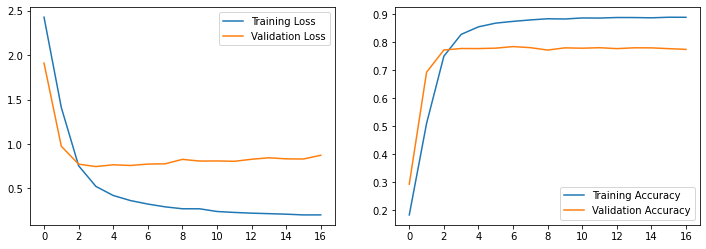

In [68]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [72]:
model = tensorflow.keras.models.load_model('/content/sample_data/modelsof_0.7847.h5')
preds = model.predict_classes(sequences_matrix_test_t)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [87]:
preds

array([4, 2, 5, ..., 2, 2, 0])

In [83]:
preds[preds==9]

array([9, 9, 9, ..., 9, 9, 9])

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#USE y_test1 instead of y_test to obtain metrics
print(confusion_matrix(y_test1, preds))
print(classification_report(y_test1, preds))
print(accuracy_score(y_test1, preds))

[[1363   30    9    4   32  147   39    5   11    8]
 [  13 1011   40    8   14   26   25    4   18   19]
 [   8   50 1014    3   10   20    6    1    4   24]
 [   7    2    3  276    8    7  142   74   19   10]
 [  31   42   39    4  991   12   42    4   14   18]
 [ 174   74   27   10    5 1212   20    2   10   14]
 [  24   49   15  131   19   31 1224  188   46   28]
 [   2    6    0   65    5    1  181  204   11    4]
 [   4   19    3   12    4   13   31   20  480   13]
 [   1   24   22    6    1   13   11    6   11 1015]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1648
           1       0.77      0.86      0.81      1178
           2       0.87      0.89      0.88      1140
           3       0.53      0.50      0.52       548
           4       0.91      0.83      0.87      1197
           5       0.82      0.78      0.80      1548
           6       0.71      0.70      0.70      1755
           7       0.40      0.43   

In [96]:
#USE y_test1 instead of y_test to obtain metrics
n_right = 0
for i in range(len(preds)):
    if preds[i] == y_test1[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test)) * 100)))

Accuracy: 78.47%


In [97]:
#Naive Bayes gave accuracy of         58.36%
#Neural Network gave accuracy of      78.47%
#Logistic Regression gave accuracy of 78.71%
#SVM gave accuracy of                 78.85%

#For now SVM model is giving better accuracy